<a href="https://colab.research.google.com/github/m0zzarella/Fundus-Imaging/blob/main/Optic_Disc_Region_Normalized_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

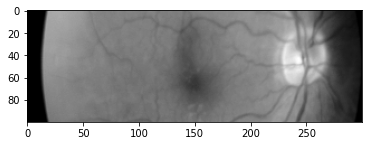

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = "/content/aria_a_46_14.png"
img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

# Divide the image into three horizontal strips and select the middle one
height, width = img.shape
strip_height = height // 3
middle_strip = img[strip_height:2*strip_height, :]

plt.imshow(middle_strip, cmap = 'gray')


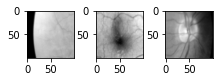

In [ ]:
# Divide the middle strip into vertical blocks
num_blocks = 3
block_width = width // num_blocks
blocks = [middle_strip[:, i*block_width:(i+1)*block_width] for i in range(num_blocks)]

# Calculate the normalized histogram plots in each block and concatenate them into a single vector

for i, block in enumerate(blocks):
    # Print the block image
    plt.subplot(4, 5, i+1)
    plt.imshow(block, cmap='gray')

plt.show()

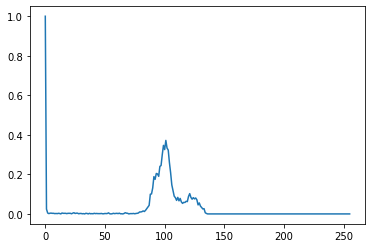

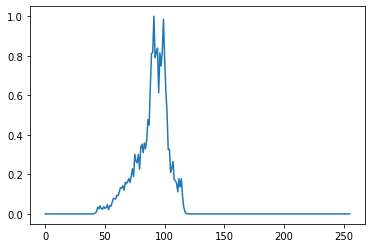

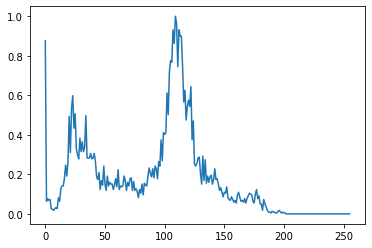

In [ ]:
hist_vector = np.empty((0,256), float)
for i, block in enumerate(blocks):
  hist = cv2.calcHist([block], [0], None, [256], [0, 256])
  hist_norm = cv2.normalize(hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
  hist_vector = np.concatenate((hist_vector, hist_norm.T), axis=0)
  
  # Plot the normalized histogram plot for this block

  plt.plot(hist_norm)
  plt.show()

#print(hist_vector)

768


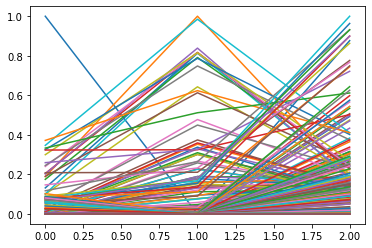

768


In [ ]:
plt.plot(hist_vector)
print(hist_vector.size)
plt.show()
hist_vector_row = hist_vector.reshape(1, -1)
#print(hist_vector_row)
print(hist_vector_row.size)
